### Bibliotecas

In [2]:
# Instalação manual de bibliotecas
!pip install numpy matplotlib pandas seaborn
# Bibliotecas


# import ml_utils as ml
# %load_ext autoreload
# %autoreload 2
# %run -i ml_utils
# %reload_ext autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

# WARNING: N entendi o que baixar na 3C TODO ver isso depois
# CUDA. Lindo. Isso vai ser divertido: https://github.com/CannyLab/tsne-cuda

### Funções utilitárias

In [3]:
def print_format(string, value):
    print(f"{string}\n{value}")

# 1) Dada a base de dados Haberman's Survival (disponibilizada em http://archive.ics.uci.edu/dataset/43/haberman+s+survival), obtenha:

Leitura dos dados

In [4]:

#Faz a leitura do arquivo com os dados
#header = None --> o arquivo não tem cabeçalho
#names --> coloca nomes para cada coluna
data = pd.read_csv('data/haberman.data', header = None, names = ['age', 'op_year', 'pos_nodes', 'survived'])
data.head()
# data.describe()

,age,op_year,pos_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## a) A média e variância de cada um dos atributos;

In [5]:
# seleciona apenas atributos de entrada
faixa = np.arange(0,3)
print(faixa)

[0 1 2]


In [6]:
# Imprime média e variância de cada atributo
print('Média')
print(data.iloc[:,faixa].mean())

print('\r\nVariância')
print(data.iloc[:,faixa].var())

Média
age          52.457516
op_year      62.852941
pos_nodes     4.026144
dtype: float64

Variância
age          116.714583
op_year       10.558631
pos_nodes     51.691118
dtype: float64


## b) A média e variância de cada um dos atributos para cada uma das classes;

In [7]:
# Como pegar atributos filtrados por classe
# Extrai todos os valores únicos e os coloca num vetor
classes = data['survived'].unique()
# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year
print(classes)

for i in range(0,classes.size):
    data_select = data[data['survived'] == classes[i]]
    print(f"Média 'survived' == {classes[i]}\n")
    print(data_select.iloc[:,faixa].mean())
    print("\n")
    print(f"Variância 'survived' == {classes[i]}\n")
    print(data_select.iloc[:,faixa].var())
    print("\n\n")


[1 2]
Média 'survived' == 1

age          52.017778
op_year      62.862222
pos_nodes     2.791111
dtype: float64


Variância 'survived' == 1

age          121.267540
op_year       10.387183
pos_nodes     34.460635
dtype: float64



Média 'survived' == 2

age          53.679012
op_year      62.827160
pos_nodes     7.456790
dtype: float64


Variância 'survived' == 2

age          103.370679
op_year       11.169753
pos_nodes     84.376235
dtype: float64





## c) A matriz de coeficientes de correlação;

In [8]:
#Usamos numpy para realizar os cálculos
eigValues, eigVectors = np.linalg.eig(data.iloc[:,faixa].corr())
print(f" {eigValues}")
print()
print(eigVectors)


 [1.11137003 0.89217623 0.99645374]

[[ 0.70131829  0.71275488  0.01153822]
 [ 0.57789155 -0.57794675  0.57621082]
 [-0.41736555  0.39743934  0.81721965]]


## d) O histograma com 8 bins de cada um dos atributos para cada uma das classes (gere gráficos dos histogramas com cores diferentes para cada classe)

classes[0] => survived
classes[1] => not survived


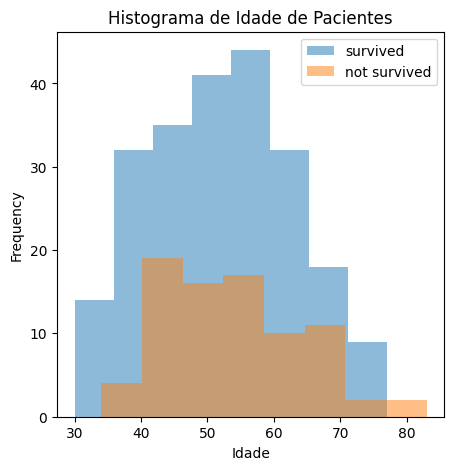

In [9]:
# Tamanho das janelas
xsize = 5
ysize = 5

# Imprime os histogramas
print('classes[0] => survived')
print('classes[1] => not survived')

# Títulos e labels de figura
figlabels = {
    "xlabel":"Idade", 
    "title":"Histograma de Idade de Pacientes"
}

# legenda
legend = ['survived', 'not survived']

# Cria o canvas
fig = plt.figure(figsize=(xsize,ysize))
ax = fig.add_subplot()

# -- AGE --
# slice = pd.DataFrame()
# slice['survived'] = data[data['survived'] == classes[0]].iloc[:,0]
# slice['not-survived'] = data[data['survived'] == classes[1]].iloc[:,0]

# slice.plot.hist(bins=8, alpha=0.5, **figlabels)

# # survived
data[data['survived'] == classes[0]].iloc[:,0].plot.hist(bins=8, alpha=0.5)
# # not survived
data[data['survived'] == classes[1]].iloc[:,0].plot.hist(bins=8, alpha=0.5, **figlabels)

ax.legend(legend)

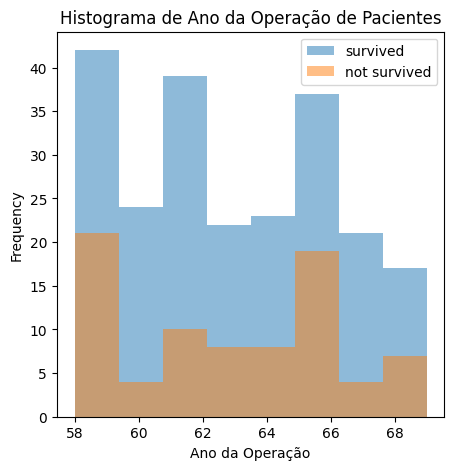

In [10]:

# -- OP_YEAR --
# Títulos e labels de figura

figlabels = {
    "xlabel":"Ano da Operação", 
    "title":"Histograma de Ano da Operação de Pacientes"
}

# Cria o canvas
# fig2 = plt.figure(figsize=(xsize,ysize))
fig = plt.figure(figsize=(xsize,ysize))
ax = fig.add_subplot()

# # survived
data[data['survived'] == classes[0]].iloc[:,1].plot.hist(bins=8, alpha=0.5)
# # not survived
data[data['survived'] == classes[1]].iloc[:,1].plot.hist(bins=8, alpha=0.5, **figlabels)

ax.legend(legend)

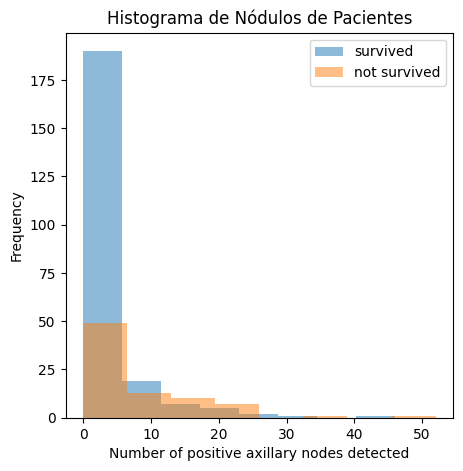

In [11]:
# -- pos_nodes --
# Títulos e labels de figura

figlabels = {
    "xlabel":"Number of positive axillary nodes detected", 
    "title":"Histograma de Nódulos de Pacientes"
}

# Cria o canvas
# fig3 = plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(xsize,ysize))
ax = fig.add_subplot()

# # survived
data[data['survived'] == classes[0]].iloc[:,2].plot.hist(bins=8, alpha=0.5)
# # not survived
data[data['survived'] == classes[1]].iloc[:,2].plot.hist(bins=8, alpha=0.5, **figlabels)

ax.legend(legend)

## e) Gere um gráfico 3D das amostras, identificando cada classe. Analise o gráfico e informe se a tarefa de classificação é fácil ou difícil e justifique a sua resposta.


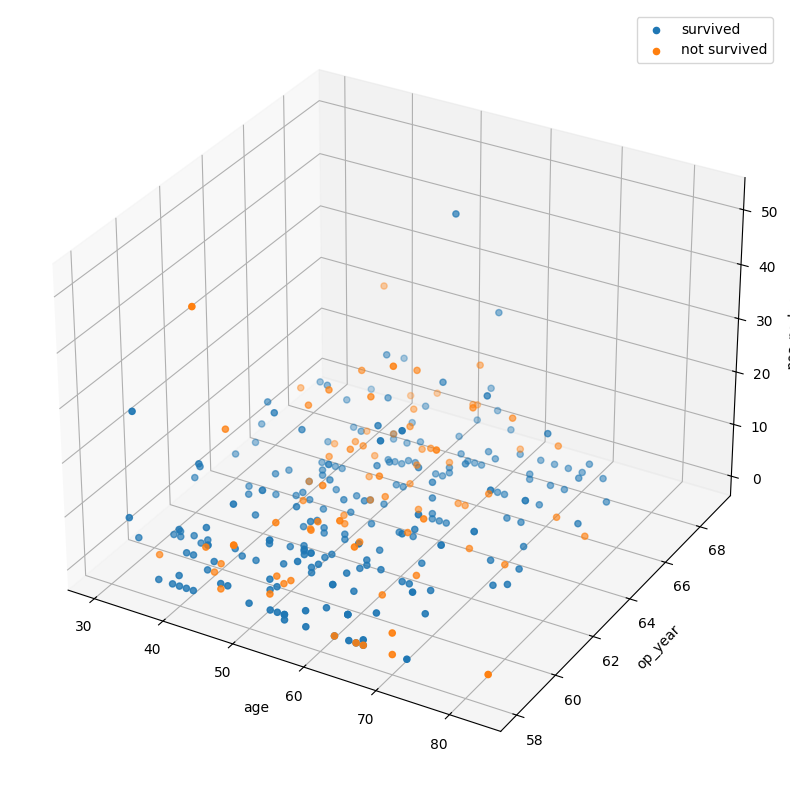

In [12]:
# Visualização 3D

# cria o canvas 3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

colors = ['tab:blue' ,'tab:orange']

ax.set_xlabel('age')
ax.set_ylabel('op_year')
ax.set_zlabel('pos_nodes')

for i in range(0,classes.size):
    data_select = data[data['survived'] == classes[i]]
    ax.scatter(data_select['age'], data_select['op_year'], data_select['pos_nodes'], marker='o', c=colors[i])

ax.legend(legend)

plt.show()

A tarefa de classificação é difícil, pois não há correlação clara de agrupamento entre os vaores dos parâmetros e a classe de cada amostra. As amostras de sobreviventes e de não sobreviventes estão misturadas.

# 2) Para a base de dados Car Evaluation, calcule a informação mútua entre os atributos de entrada (as 5 primeiras colunas) e o atributo de saída (a última coluna). Informe os resultados e comente a sua solução.

### Funções

In [13]:
# Função que calcula probabilidade de um ou mais atributos dentro de um dataset
#   data: dataset
#   atribute: a lista de (um ou dois) atributos cuja probabilidade será calculada
# retorna: um float correspondente à probabilidade requerida
def probabilidade(data, atributes):
    probability_vector = data.value_counts(subset=atributes, normalize=True)
    return probability_vector

# Função que calcula entropia de um ou mais atributos dentro de um dataset
#   data: dataset
#   atribute: a lista de (um ou mais) atributos cuja entropia será calculada
# retorna: valor resultante do cálculo
def entropy(data, atributes):
    probability_vector = probabilidade(data, atributes)
    sum_elements = probability_vector.apply(lambda x: -x*math.log2(x))
    entropy_result = sum_elements.sum()
    return entropy_result

# Função que calcula informação mútua entre DOIS atributos dentro de um dataset
#   data: dataset
#   x: primeiro atributo
#   y: segundo atributo
# retorna: valor resultante do cálculo
def mutual_information(data, two_attributes):
    if len(two_attributes) != 2:
        print(f"FATAL ERROR: mutual_information -> len(two_attributes) = {len(two_attributes)}\n You are probably trying to calculate mutual information of more than 2 variables simultaneously\nTHIS IS NOT YET SUPPORTED")
    return entropy(data, two_attributes[0]) + entropy(data, two_attributes[1]) - entropy(data, two_attributes) 

def mutual_information_normalized(data, two_attributes):
    not_normalized_value = mutual_information(data, two_attributes)
    normalized_value = math.sqrt((not_normalized_value**2)/(entropy(data, two_attributes[0]) * entropy(data, two_attributes[1])))
    return normalized_value
    

# #teste de sanidade das funções

raw_data = [[0, 1, 1],
            [1, 1, 0],
            [0, 1, 1],
            [1, 0, 0]]
idx = ['x1', 'x2', 'x3']
data_test = pd.DataFrame(data=raw_data, columns=idx)

# print(probabilidade(data_test, ['x1']))
# print(probabilidade(data_test, ['x2']))
# print(probabilidade(data_test, ['x3']))
# print()
# print(probabilidade(data_test, ['x1', 'x2']))
# print(probabilidade(data_test, ['x1', 'x3']))
# print(probabilidade(data_test, ['x2', 'x3']))

# print(entropy(data_test, ['x1']))
# print(entropy(data_test, ['x2']))
# print(entropy(data_test, ['x3']))
# print(entropy(data_test, ['x1', 'x2']))
# print(entropy(data_test, ['x1', 'x3']))
# print(entropy(data_test, ['x2', 'x3']))

# print(mutual_information(data_test, ['x1', 'x2']))
print(mutual_information(data_test, ['x1', 'x3']))
print(mutual_information(data_test, ['x2', 'x3']))

# print(mutual_information_normalized(data_test, ['x1', 'x2']))
print(mutual_information_normalized(data_test, ['x1', 'x3']))
print(mutual_information_normalized(data_test, ['x2', 'x3']))


1.0
0.31127812445913294
1.0
0.34559202994421145


### Resposta

In [14]:
## Leitura inicial
features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('data/car.data', header = None, names = features)

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [15]:

for i in range(len(features)-2, -1, -1):
    print(f"Informação mútua normalizada entre {features[len(features)-1]} e {features[i]}: \n{mutual_information_normalized(data, [features[len(features)-1],features[i]])}")

Informação mútua normalizada entre class e safety: 
0.18965760884122598
Informação mútua normalizada entre class e lug_boot: 
0.021707139165691364
Informação mútua normalizada entre class e persons: 
0.1588986960379627
Informação mútua normalizada entre class e doors: 
0.0028886161020757416
Informação mútua normalizada entre class e maint: 
0.047462295455740225
Informação mútua normalizada entre class e buying: 
0.062109149676966846


Observa-se que os atributos mais correlacionados com a classificação são 'safety' e 'persons', o que indica que o nível de segurança e o número de lugares possuem grande influência na escolha da compra.
Ambos os valores estão acima de 0,15. 
Todos os outros valores estão abaixo de 0,065, indicando que eles possuem menor correlação com a saída 

# 3) Dada a base de dados CNAE_9_reduzido (em anexo):



## a) gere um gráfico 2D com os dois componentes principais (uso de PCA) das amostras, identificando cada classe (a base possui 5 classes. O rótulo das amostras está na primeira coluna. Essa coluna não deve ser usada no PCA). Pode usar a função eig do Matlab ou do Python. 


### Importando os dados

In [22]:
## Leitura inicial
# features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('data/CNAE_9_reduzido.txt', sep=None, header = None)

data.head()

/tmp/ipykernel_2443/1595068272.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('data/CNAE_9_reduzido.txt', sep=None, header = None)


,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Calcular a matriz C: matriz de covariância / coeficientes de correlação dos dados;

In [23]:
# Usando matriz de covariância

faixa = np.arange(1,data.shape[1])
# print_format(faixa)

# calculamos os autovalores e autovetores da matriz de covariância
eigValues_cov, eigVectors_cov = np.linalg.eig(data.iloc[:,faixa].cov()) 
# print_format(eigValues_cov)
print_format("eigVectors_cov.shape = ", eigVectors_cov.shape)
print_format("eigVectors_cov = ", eigVectors_cov)

# #Subtrair dos dados a média
data_cov = data.iloc[:,faixa] - data.iloc[:,faixa].mean() 


# Usando matriz de coef. de correlação
eigValues_corr, eigVectors_corr = np.linalg.eig(data.iloc[:,faixa].corr())
# print_format("eigValues_corr", eigValues_corr)
print_format("eigVectors_corr = ", eigVectors_corr)

#Subtrair dos dados a média e divide pelo desvio padrão
data_corr = (data.iloc[:,faixa] - data.iloc[:,faixa].mean())/data.iloc[:,faixa].std()


# Selecionamos os dois primeiros autovetores (nesse caso, associados aos maiores autovalores)
# Matrizes de projeção dos dados
M_cov = eigVectors_cov[:,0:2]
M_corr = eigVectors_corr[:,0:2]

#Projeta os dados nos autovetores principais
proj_data_cov = data_cov @ M_cov
proj_data_corr = data_corr @ M_corr
print_format("proj_data_cov = ", proj_data_cov)

classes = data.iloc[:,0].unique()
print_format("classes = ", classes)


eigVectors_cov.shape = 
(502, 502)
eigVectors_cov = 
[[ 1.26165128e-03+0.00000000e+00j -3.65184823e-04+0.00000000e+00j
  -1.97830331e-03+0.00000000e+00j ... -7.26172859e-03-1.80626932e-03j
  -7.26172859e-03+1.80626932e-03j -7.08076352e-03+0.00000000e+00j]
 [ 1.30532092e-03+0.00000000e+00j  1.44828288e-03+0.00000000e+00j
  -1.72673708e-03+0.00000000e+00j ... -2.51579044e-15+9.19726227e-16j
  -2.51579044e-15-9.19726227e-16j -3.89706870e-15+0.00000000e+00j]
 [-1.51630847e-02+0.00000000e+00j -1.13711288e-01+0.00000000e+00j
  -1.12727186e-02+0.00000000e+00j ...  1.51189287e-16+1.06608067e-18j
   1.51189287e-16-1.06608067e-18j  3.88526230e-17+0.00000000e+00j]
 ...
 [ 9.49782103e-04+0.00000000e+00j  2.91862538e-04+0.00000000e+00j
  -1.87448527e-03+0.00000000e+00j ...  3.91465101e-16+1.41360165e-16j
   3.91465101e-16-1.41360165e-16j  2.95271416e-16+0.00000000e+00j]
 [-8.56531133e-02+0.00000000e+00j  3.39352737e-02+0.00000000e+00j
  -2.31016203e-02+0.00000000e+00j ...  5.59099690e-17+1.90860252

Plota os gráficos

[2.89134648 2.29288783 2.84707063]


/home/harmonia/codes/machine-learning-laboratory-2023-2/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/harmonia/codes/machine-learning-laboratory-2023-2/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


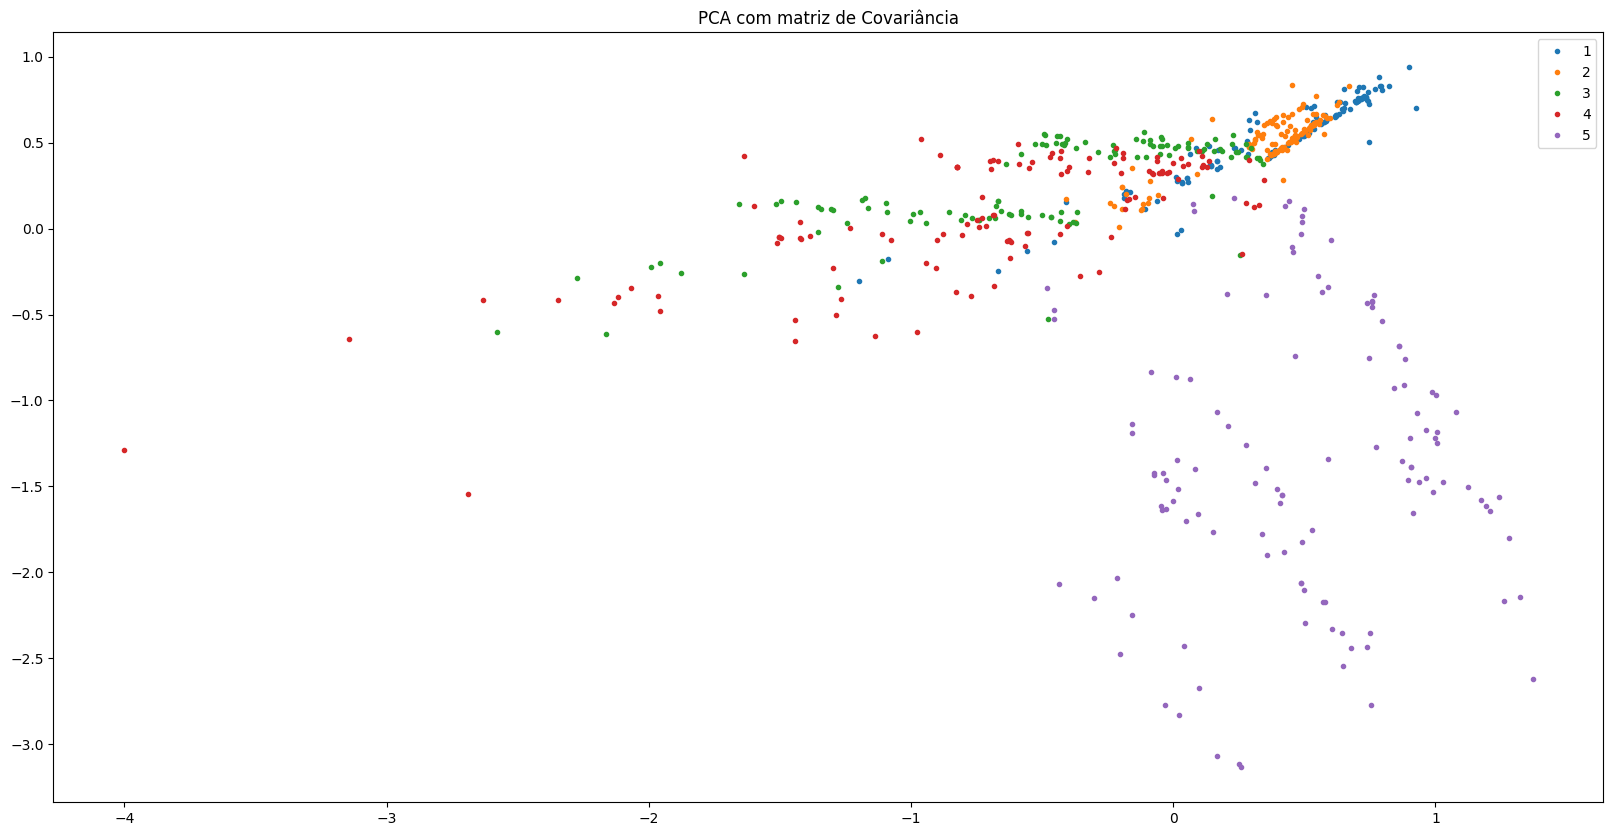

In [24]:
print(np.random.uniform(1,3,3))
# Cria o canvas
xsize = 20
ysize = 10
fig = plt.figure(figsize=(xsize,ysize))

# define cores
colors = ['tab:blue' ,'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Plota os gráficos
for i in range(0,classes.size):
	data_select = proj_data_cov[data.iloc[:,0] == classes[i]]
	# print_format("data_select", data_select)
	plt.plot(data_select[1],data_select[0], marker='.', linestyle='', c=colors[i])

# Títulos e labels de figura
legend = classes
plt.title("PCA com matriz de Covariância")
plt.legend(legend)

# # Cria outro canvas
# fig = plt.figure(figsize=(xsize,ysize))

# # Plota os gráficos
# for i in range(0,classes.size):
# 	data_select = proj_data_corr[data.iloc[:,0] == classes[i]]
# 	# print_format("data_select", data_select)
# 	plt.plot(data_select[1],data_select[0], marker='.', linestyle='', c=colors[i])

# # Títulos e labels de figura
# legend = classes
# plt.title("PCA com matriz de coeficentes de correlação")
# plt.legend(legend)

## b) gere um gráfico 2D com os dois componentes principais (uso de PCA) das amostras, identificando cada classe (a base possui 5 classes). Para este gráfico realize o branqueamento dos dados (isto é, após a aplicação do PCA garantir que a matriz de covariância dos dados seja uma matriz identidade). O que tem de diferente entre os gráficos de a) e b)?

In [25]:
# Usando matriz de coeficientes de correlação

# seleciona colunas de 1 até a última
faixa = np.arange(1,data.shape[1])

# calculamos os autovalores e autovetores da matriz de coeficientes de correlação
eigValues_corr, eigVectors_corr = np.linalg.eig(data.iloc[:,faixa].corr()) 

# print_format("eigVectors_corr.shape = ", eigVectors_corr.shape)
# print_format("eigVectors_corr = ", eigVectors_corr)

# #Subtrair dos dados a média e dividir pelo desvio padrão
data_corr = (data.iloc[:,faixa] - data.iloc[:,faixa].mean())/data.iloc[:,faixa].std()

# Selecionamos os dois primeiros autovetores (nesse caso, associados aos maiores autovalores)
# Matrizes de projeção dos dados
M_corr = eigVectors_corr[:,0:2]

# Projeta os dados nos autovetores principais, realizando branqueamento dos dados

V = np.diag(eigValues_corr[0:2]) # quais autovalores tenho que botar nesse cálculo?

## Equação de branqueamento: proj_data_corr = data_corr * M_corr * T(V^(-1/2))
V_op = np.transpose(np.linalg.inv(np.sqrt(V)))
proj_data_corr = data_corr @ M_corr @ V_op
# print_format("proj_data_corr = ", proj_data_corr)

classes = data.iloc[:,0].unique()
# print_format("classes = ", classes)

# Verificando que a matriz de covariância no resultado do PCA é a matriz identidade
print_format("proj_data_corr.cov()", proj_data_corr.cov())


proj_data_corr.cov()
              0             1
0  1.000000e+00 -2.256774e-15
1 -2.256774e-15  1.000000e+00


/home/harmonia/codes/machine-learning-laboratory-2023-2/.venv/lib/python3.11/site-packages/pandas/core/internals/managers.py:1650: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(blk.values, dtype=dtype, copy=copy)


Gerando os gráficos:

[2.26796951 2.40067798 1.79670768]


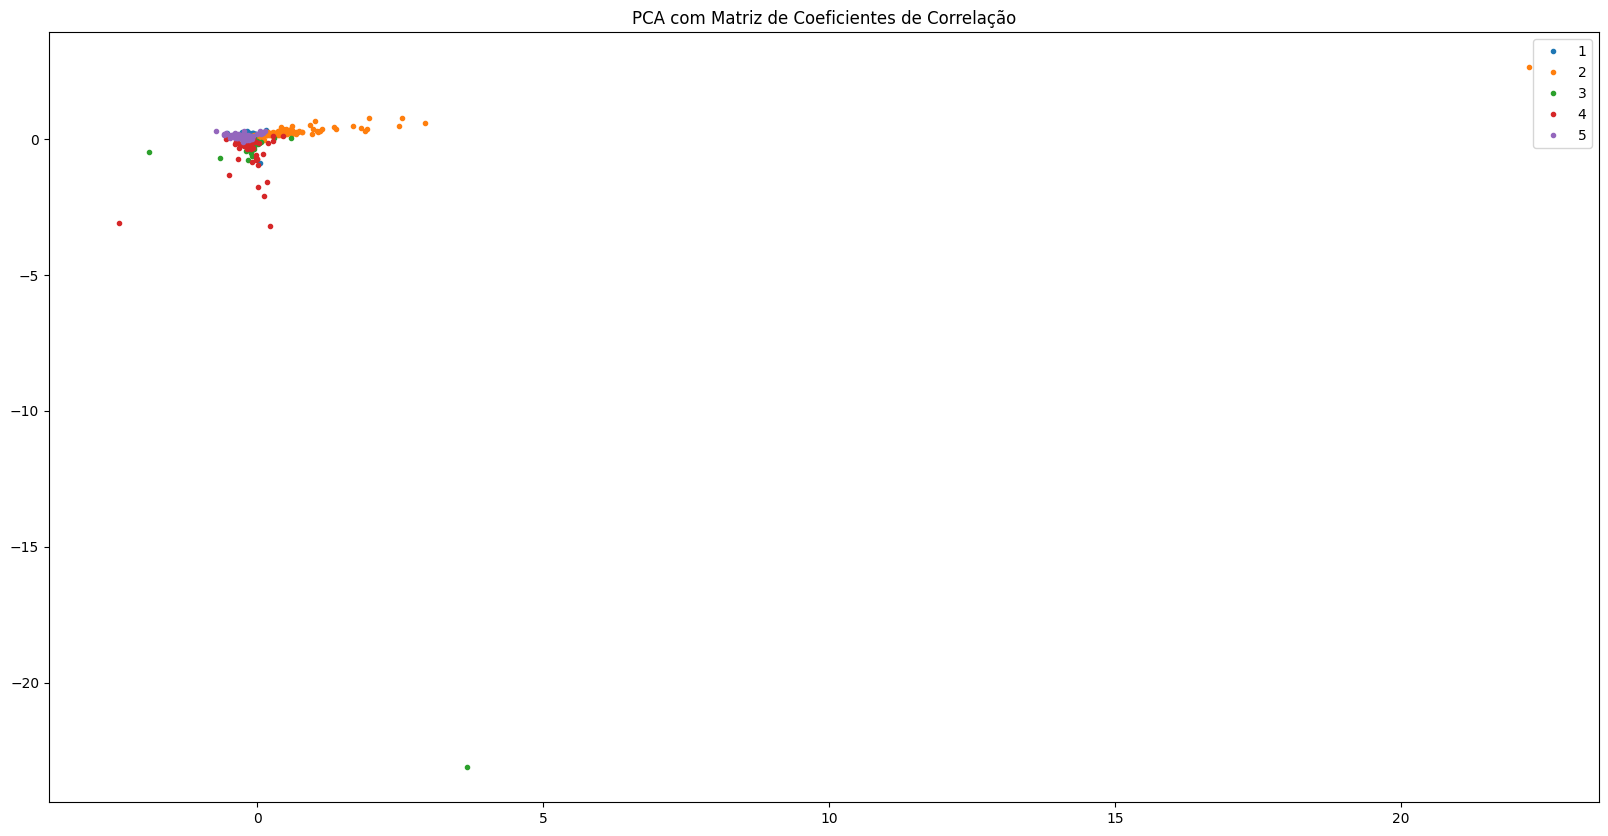

In [62]:
print(np.random.uniform(1,3,3))
# Cria o canvas
xsize = 20
ysize = 10
fig = plt.figure(figsize=(xsize,ysize))

# define cores
colors = ['tab:blue' ,'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Plota os gráficos
for i in range(0,classes.size):
	data_select = proj_data_corr[data.iloc[:,0] == classes[i]]
	# print_format("data_select", data_select)
	plt.plot(data_select[1],data_select[0], marker='.', linestyle='', c=colors[i])

# Títulos e labels de figura
legend = classes
plt.title("PCA com Matriz de Coeficientes de Correlação")
plt.legend(legend)



## c) gere um gráfico 2D usando o t-SNE (pode usar o código disponível em https://lvdmaaten.github.io/tsne/ com os parâmetros default), identificando cada classe (a base possui 5 classes). Lembre-se de não usar a coluna de rótulos para obter a redução de dimensão.

In [27]:
import numpy as np
import pylab
from tsne import *

# print(data.shape[1])

In [33]:
print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")

# Coloca dados de entrada sem a coluna de classes
X = data.iloc[:,faixa]
n_collumns = data.shape[1] - 1

Y = tsne(X, 2, n_collumns, 20.0)

Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.
Preprocessing the data using PCA...


Computing pairwise distances...
Computing P-values for point 0 of 600...
Computing P-values for point 500 of 600...
Mean value of sigma: 0.929441
Iteration 10: error is 16.481109
Iteration 20: error is 15.100240
Iteration 30: error is 14.940254
Iteration 40: error is 15.006058
Iteration 50: error is 15.081322
Iteration 60: error is 14.748253
Iteration 70: error is 15.016522
Iteration 80: error is 15.077820
Iteration 90: error is 15.005533
Iteration 100: error is 15.245189
Iteration 110: error is 1.775830
Iteration 120: error is 1.317186
Iteration 130: error is 1.149925
Iteration 140: error is 1.039296
Iteration 150: error is 0.999569
Iteration 160: error is 0.972376
Iteration 170: error is 0.953514
Iteration 180: error is 0.939373
Iteration 190: error is 0.928316
Iteration 200: error is 0.919581
Iteration 210: error is 0.912229
Iteration 220: error is 0.905882
Iteration 230: error is 0.896587
Iteration 240: error is 0.891154
Iteration 250: error is 0.887652
Iteration 260: error is 0.88

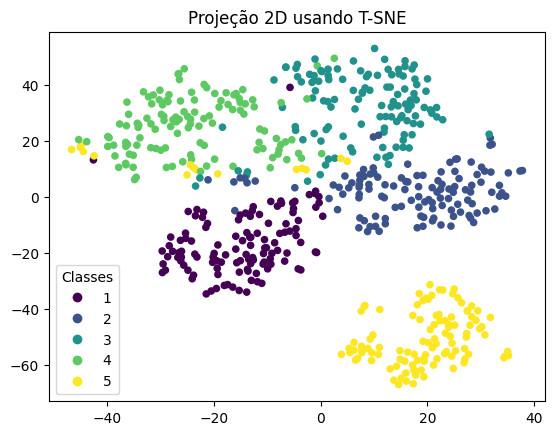

In [59]:
fig, ax = plt.subplots()

# Plota os gráficos
scatter = plt.scatter(Y[:, 0], Y[:, 1], 20, data.iloc[:,0])

# Produz legenda com cores únicas a partir do scatterplot
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")

plt.title("Projeção 2D usando T-SNE")

plt.show()

## d) Utilize as primeiras 480 amostras para treinar o classificador vizinho mais próximo (NN) (utilize a distância Euclidiana) e as demais 120 para teste. Calcule a métrica acurácia e informe o valor obtido. Pelo resultado obtido, qual dos gráficos (t-SNE ou PCA) você acha que melhor representou a “realidade” da distribuição dos dados? Por quê?

### Functions

In [ ]:
# Entradas: 
#   input -> dados a serem classificados
#   model -> matriz de dados de treinamento (linhas são amostras, colunas são features)
# Retorna: Classificação das amostras de entrada
def nn(X=np.array([]), no_dims=2, initial_dims=50):
    print("TODO")
    

### Faixas

In [66]:
train_range = np.arange(0,480)
data_train = data.iloc[train_range,:] 

test_range = np.arange(481,data.shape[0])
data_test = data.iloc[test_range,:]

### Treinamento

# 4) Dada a base de dados Breast Cancer Wisconsin (Diagnostic):


## a) Obtenha a acurácia de classificação quando usando o classificador vizinho mais próximo (NN) (utilize a distância Euclidiana). Use os dados do arquivo wdbc.data, sendo as primeiras 300 amostras para treino e as demais para teste. Antes, repare os atributos da base de dados e a posição dos rótulos. Quais atributos você pode eliminar da base de dados antes do experimento? Por quê?

## b) Aplique o PCA sobre os dados de treino (use a matriz de coeficientes de correlação) e selecione o número de componentes até eles corresponderem a 90% da informação de variância dos dados (conforme mostrado nos slides) (lembre-se que no PCA não entra o rótulo das amostras). Quantos componentes foram selecionados? Calcule a nova acurácia do NN usando as componentes selecionadas. O resultado alterou de forma significativa em relação ao obtido em a)? Qual foi a vantagem observada usando PCA?

## c) Aplique o Discriminante Linear de Fisher sobre os dados de treino (lembre-se que ele é supervisionado). Obtenha os novos dados após a aplicação de Fisher sobre os dados de treino e obtenha a acurácia do NN sobre o conjunto de teste. Quais as vantagens desta abordagem sobre o PCA?